# Regression

Regression is a group of techniques used to predict a dependent variable based upon one or more independent variables.
There are many types of regression analysis, but they all have the same end goal.
### Some of the most used types are:
- Linear
- Logistic
- Polynomial

### Regression works by:
choosing one dependent variable to predict, then analyze the correlation between this dependent variable and one or more independent variable.
A dependent variable is a variable which is effected by a change in a independent variable. Where an independent variable is not effected by a change in another variable.

### A classic regression analysis problem is:
predicting the value of a house based on variables such as:
- Size
- Year built
- Year renovated
- Number of floors
- Number of bedrooms
- etc.

In this example the dependent variable is the price since it is dependent on the other variables such as "size" and "number of bedrooms",
while the independent variables such as "Year built" is not effected by a change in the number of beds.

In a finished regression model you should be able to feed it a value for each variable and the model should spit out what it thinks will be the price of the house with those values.

# The dataset

The dataset I'm using for this regression task is: Medical Cost. The goal of this dataset is to predict the dependent variable charges (how much treatment cost) based on the independent variables: age, sex, bmi, children, smoker and region.
In this notebook I try to conclude with which variables have a strong correlation with charges.

# Layout:
The notebook starts with some basic "get to know the dataset" commands. Just to get a feel of what we are working with.

#### Data cleaning:
Then the data cleaning/ cleansing begins. This is where I remove columns I know will not be a part of the model, fix null-values, encode categorical values, and normalize attributes.
At first glance I couldn't see any attributes I know I should remove and therefor I wait with this step til after the Feature Correlation Analysis. The dataset didn't contain any null-values and
this step was then skipped. I changed the datatypes of the attributes Sex and Smoker to category, so I could then one-hot encode them.

#### EDA
Next comes the EDA.
First I begin with Feature Correlation Analysis. FCA is about using statistics and visual representations of the dataset to find correlations between the dependant variable (charges) and the independent variables, with the end goal
of determining which attributes should be a part of the final model.
The process of removing unwanted columns is known as Feature Selection and is an important part of creating a good ML Model. In this dataset I could see a clear correlation between the
dependent variable and most of the independent variables.


# Conclusion

Through my analysis and visual representations I see great correlations between the dependent variable charges and the independent variables: smoker, bmi and age. There is also a good correlation
between the region southeast and charges, but this is due to the more overweight population. However, the variables sex and children didn't seem to effect the charges by a significant amount. Normally
these variables would most likely be removed in bigger datasets due to the computational cost, but since this is such a small dataset, I see no reason to do this.

I could have done WAY more EDA, but I think I analyzed the most important correlations.


# The Final Dataset
In the final dataset I chose to replace the columns: age and bmi with AgeGroup and BMIGroup. After what I've understood, this will give me better models.

In [698]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [699]:
# Load dataset
df = pd.read_csv('insurance.csv')

## Data preprocessing

In [700]:
df.shape

(1338, 7)

In [701]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [702]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [703]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [704]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [705]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Cleaning the dataset

In [706]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [707]:
# Encoding to be represented by either ones or zeroes
df['sex'] = df['sex'].replace(['female', 'male'], [0,1])
df['smoker'] = df['smoker'].replace(['no', 'yes'], [0,1])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [708]:
# Idea I got from a Titanic notebook, but looks like a common practice
# I could remove variables age, bmi and charges after this
def bins(df):
    df['AgeGroup'] = 0
    df.loc[df['age'] < 27.2, 'AgeGroup' ] = 0
    df.loc[(df['age'] >= 27.2) & (df['age'] < 36.4), 'AgeGroup'] = 1
    df.loc[(df['age'] >= 36.4) & (df['age'] < 45.6), 'AgeGroup'] = 2
    df.loc[(df['age'] >= 45.6) & (df['age'] < 54.8), 'AgeGroup'] = 3
    df.loc[df['age'] >= 54.8, 'AgeGroup'] = 4

    df['BMIGroup'] = 0
    df.loc[df['bmi'] < 23.394, 'BMIGroup' ] = 0
    df.loc[(df['bmi'] >= 23.394) & (df['bmi'] < 30.828), 'BMIGroup'] = 1
    df.loc[(df['bmi'] >= 30.828) & (df['bmi'] < 38.262), 'BMIGroup'] = 2
    df.loc[(df['bmi'] >= 38.262) & (df['bmi'] < 45.696), 'BMIGroup'] = 3
    df.loc[df['bmi'] >= 45.696, 'BMIGroup'] = 4

    return df

def min_max_normalizing(df):
    df['age'] = (df['age'] - df['age'].min()) / \
                      (df['age'].max() - df['age'].min())

    df['bmi'] = (df['bmi'] - df['bmi'].min()) / \
                      (df['bmi'].max() - df['bmi'].min())

    # df_copy['charges'] = (df_copy['charges'] - df_copy['charges'].min()) / \
    #                   (df_copy['charges'].max() - df_copy['charges'].min())

    return df

# Z-score Normalizing
def z_score_normalizing(df):
    df['age'] = (df['age'] - df['age'].mean()) / df['age'].std()
    df['bmi'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()
    # df_copy['charges'] = (df_copy['charges'] - df_copy['charges'].mean()) / df_copy['charges'].std()

    return df

df = bins(df)

df

,age,sex,bmi,children,smoker,region,charges,AgeGroup,BMIGroup
0,19,0,27.900,0,1,southwest,16884.92400,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,2
2,28,1,33.000,3,0,southeast,4449.46200,1,2
3,33,1,22.705,0,0,northwest,21984.47061,1,0
4,32,1,28.880,0,0,northwest,3866.85520,1,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,3,2
1334,18,0,31.920,0,0,northeast,2205.98080,0,2
1335,18,0,36.850,0,0,southeast,1629.83350,0,2
1336,21,0,25.800,0,0,southwest,2007.94500,0,1


# EDA

## Feature Correlation Investigation

In [709]:
df[['smoker', 'charges']].groupby(['smoker'], as_index=False).mean().sort_values(by='charges', ascending=False)

,smoker,charges
1,1,32050.231832
0,0,8434.268298


Here you can see the mean charges for both smokers and none smokers. By the looks of it, smoking has the biggest correlation with charges. This is quite self-explanatory.

In [710]:
df[['BMIGroup', 'charges']].groupby(['BMIGroup'], as_index=False).mean().sort_values(by='charges', ascending=False)

,BMIGroup,charges
4,4,17289.421583
2,2,15790.802305
3,3,15258.426910
1,1,11554.830480
0,0,9503.486692


You can see a clear correlation between higher BMI and higher charges.

In [711]:
df[['sex', 'charges']].groupby(['sex'], as_index=False).mean().sort_values(by='charges', ascending=False)

,sex,charges
1,1,13956.751178
0,0,12569.578844


As you can see there is no big difference between the genders.

In [712]:
df[['children', 'charges']].groupby(['children'], as_index=False).mean().sort_values(by='charges', ascending=False)

,children,charges
3,3,15355.318367
2,2,15073.563734
4,4,13850.656311
1,1,12731.171832
0,0,12365.975602
5,5,8786.035247


Here you can see that the number of children doesn't have a strong positive correlation with charges (if you look away from the outlier of 5 children). I think I can conclude with this not being an important variable for predicting charges, but will do further investigation. I will try to confirm this with a heatmap later on.

In [713]:
df[['region', 'charges']].groupby(['region'], as_index=False).mean().sort_values(by='charges', ascending=False)

,region,charges
2,southeast,14735.411438
0,northeast,13406.384516
1,northwest,12417.575374
3,southwest,12346.937377


While most regions have a somewhat same mean, the southeast takes a massive lead. This can come from a handful of different reasons.
As we explored earlier especially BMI and smoking raised the price of treatment by a lot.

In [714]:
df[['region', 'BMIGroup']].groupby(['region'], as_index=False).mean().sort_values(by='BMIGroup', ascending=False)

,region,BMIGroup
2,southeast,1.832418
3,southwest,1.449231
1,northwest,1.289231
0,northeast,1.277778


Here you can see that the average BMIGroup for the region southeast is way higher than the rest. This is most likely the reason for the higher charges in this region.

In [715]:
df[['region', 'AgeGroup']].groupby(['region'], as_index=False).mean().sort_values(by='AgeGroup', ascending=False)

,region,AgeGroup
3,southwest,1.855385
0,northeast,1.848765
1,northwest,1.830769
2,southeast,1.813187


In [716]:
# Make Sex and Smoker categorical values to be able to use them in a heatmap
df['sex'] =  df['sex'].astype('category')
df['smoker'] =  df['smoker'].astype('category')
df.info()
df_encoded = pd.get_dummies(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
 7   AgeGroup  1338 non-null   int64   
 8   BMIGroup  1338 non-null   int64   
dtypes: category(2), float64(2), int64(4), object(1)
memory usage: 76.2+ KB


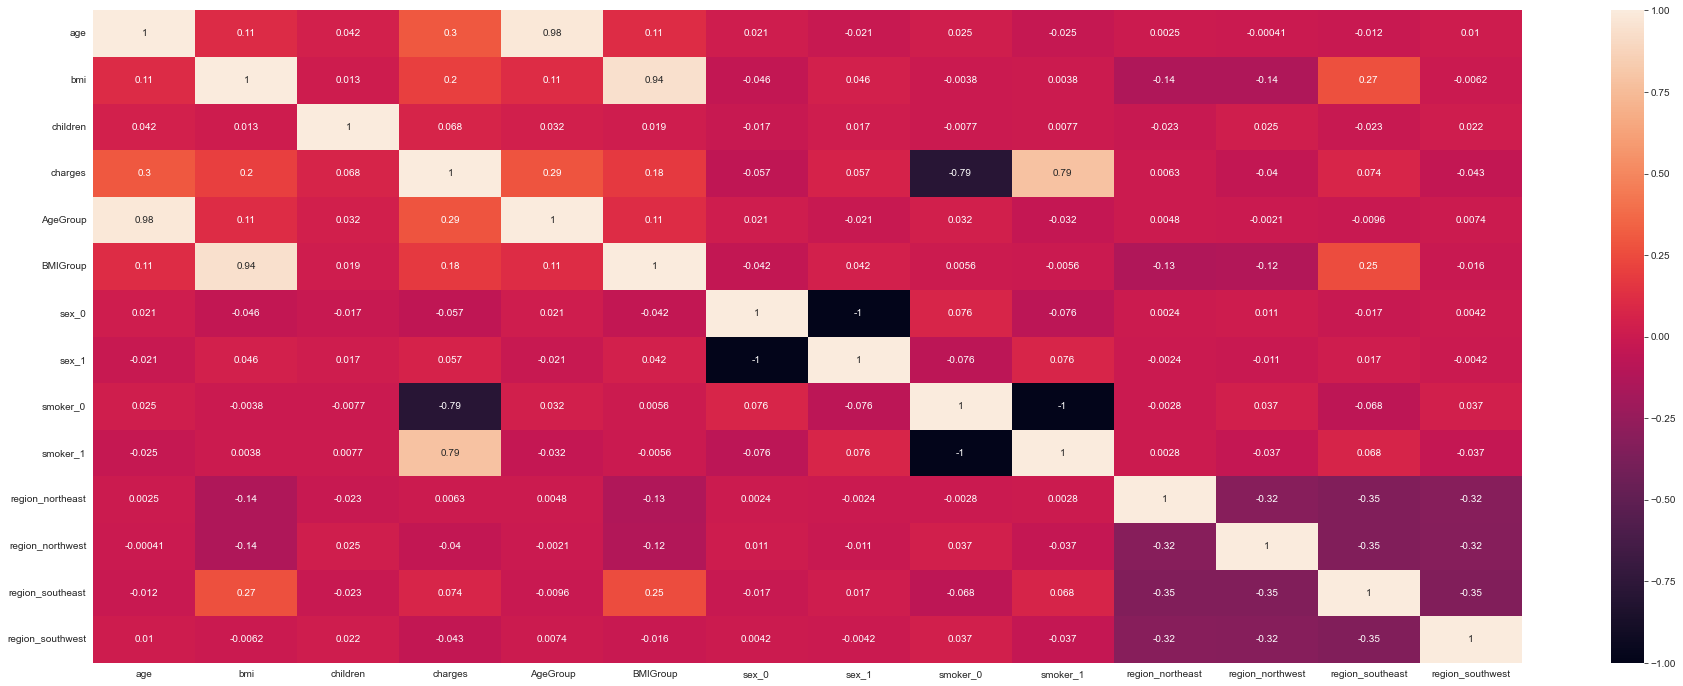

In [717]:
corr = df_encoded.corr()
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(corr, annot=True)

The heatmap confirms all of my hypothesis. We can see a great positive correlation between charges and: age, bmi and smoker.

Distribution of age. I would call this an even distribution.

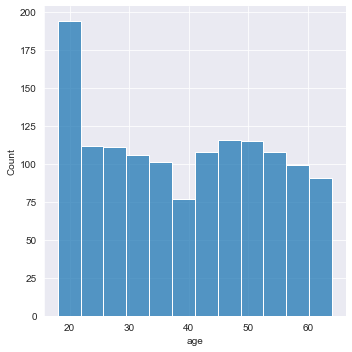

In [718]:
sns.displot(df, x=df['age'])

Distribution of age compared to charges. Here we can clearly see that the min charges raises as one gets older.

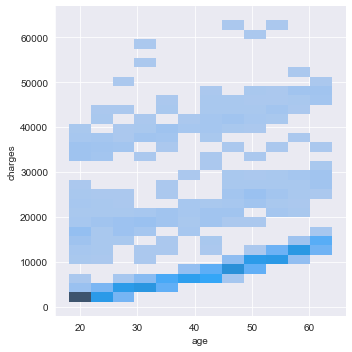

In [719]:
sns.displot(df, y=df['charges'], x=df['age'])

A good visualisation of charges compared to BMI. Here we can see that the higher the bmi, the higher the outliers get

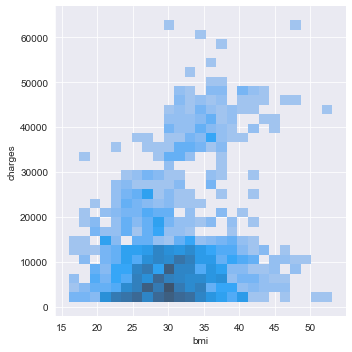

In [720]:
sns.displot(df, y=df['charges'], x=df['bmi'])

Distribution of BMI. Looks like the average BMI is around 30, which is considered overweight.

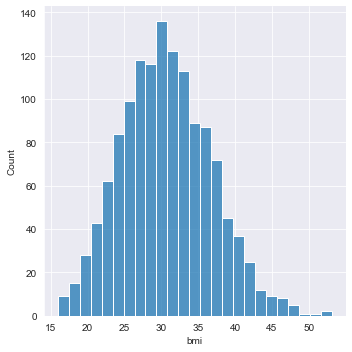

In [721]:
sns.displot(df, x=df['bmi'])

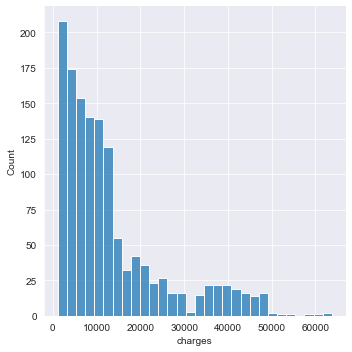

In [722]:
sns.displot(df, x=df['charges'])

Most charges are on the lower side and since the age is evenly distributed we can tell that the population is mostly healthy.
I can draw this conclusion due to unhealthy habits such as smoking and being overweight increases a charge by a lot.

# The Final Dataset

In [723]:
df = df.drop(['age', 'bmi'], axis=1)
df

,sex,children,smoker,region,charges,AgeGroup,BMIGroup
0,0,0,1,southwest,16884.92400,0,1
1,1,1,0,southeast,1725.55230,0,2
2,1,3,0,southeast,4449.46200,1,2
3,1,0,0,northwest,21984.47061,1,0
4,1,0,0,northwest,3866.85520,1,1
...,...,...,...,...,...,...,...
1333,1,3,0,northwest,10600.54830,3,2
1334,0,0,0,northeast,2205.98080,0,2
1335,0,0,0,southeast,1629.83350,0,2
1336,0,0,0,southwest,2007.94500,0,1


# Splitting Data

In [724]:
train = df.sample(frac=0.6)
val_test = df.drop(train.index)
val = val_test.sample(frac=0.5)
test = val_test.drop(val.index)